# make_blobs 데이터 시각화: cluster_std vs Noise

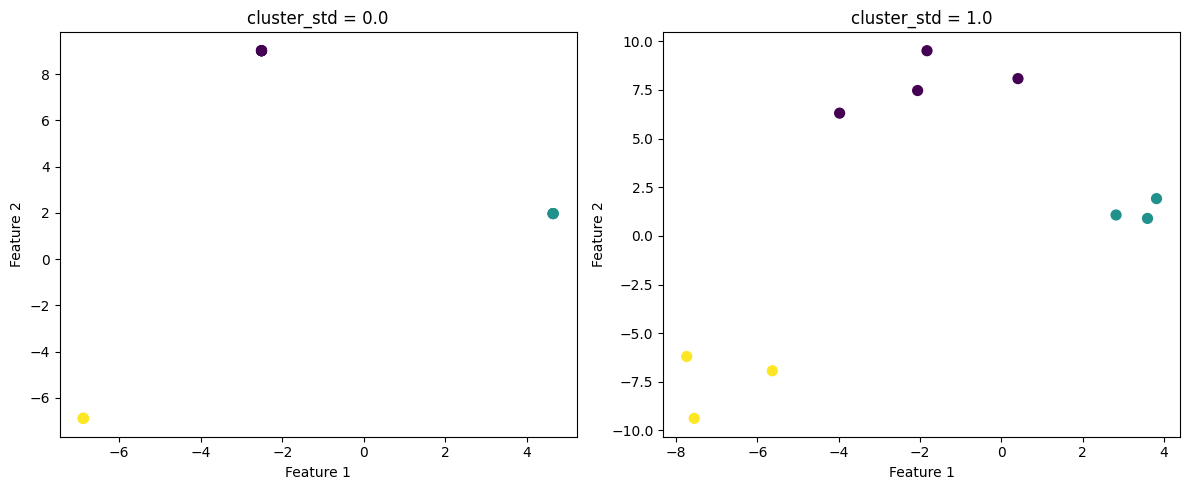

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 데이터 생성

n_samples = 10
centers = 3
random_state = 42

cluster_std = 0.0
noise_std = 1.0

# 1. cluster_std 증가
X_std, y_std = make_blobs(n_samples=n_samples, centers=centers, 
                          cluster_std=cluster_std, n_features=2, random_state=random_state)

# 2. 노이즈 추가
#X_noise, y_noise = make_blobs(n_samples=n_samples, centers=centers, 
#                              cluster_std=cluster_std, n_features=2, random_state=random_state)
##X_noise += np.random.normal(0, noise_std, X_noise.shape)

X_noise, y_noise = make_blobs(n_samples=n_samples, centers=centers, 
                              cluster_std=noise_std, n_features=2, random_state=random_state)
X_noise += np.random.normal(0, noise_std, X_noise.shape)# 노이즈 추가

# 시각화
plt.figure(figsize=(12, 5))

# cluster_std 증가 데이터
plt.subplot(1, 2, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_std, cmap='viridis', s=50)
plt.title(f"cluster_std = {cluster_std}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 노이즈 추가 데이터
plt.subplot(1, 2, 2)
plt.scatter(X_noise[:, 0], X_noise[:, 1], c=y_noise, cmap='viridis', s=50)
#plt.title(f"cluster_std = {cluster_std}, noise_std={noise_std}")
plt.title(f"cluster_std = {noise_std}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [19]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 기본 설정
n_samples = 100
centers = 3
random_state = 42
n_test_samples = 100

# 결과 저장용 딕셔너리
results = {}

# cluster_std 1부터 10까지
for cluster_std in range(1, 11):
    # 훈련 데이터 생성
    X_train, y_train = make_blobs(n_samples=n_samples, centers=centers,
                                cluster_std=cluster_std, n_features=2,
                                random_state=random_state)
    
    # 테스트 데이터 생성
    X_test, y_test = make_blobs(n_samples=n_test_samples, centers=centers,
                               cluster_std=cluster_std, n_features=2,
                               random_state=random_state)
    
    # k 값 1부터 5까지
    k_results = {}
    for k in range(1, 6):
        # KNN 모델 생성 및 학습
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # 테스트 데이터 예측
        y_pred = knn.predict(X_test)
        
        # 정확도 계산
        accuracy = accuracy_score(y_test, y_pred)
        k_results[k] = accuracy
    
    results[cluster_std] = k_results

# 결과 출력
for std in results:
    print(f"\ncluster_std = {std}:")
    for k in results[std]:
        print(f"k = {k}: accuracy = {results[std][k]:.3f}")


cluster_std = 1:
k = 1: accuracy = 1.000
k = 2: accuracy = 1.000
k = 3: accuracy = 1.000
k = 4: accuracy = 1.000
k = 5: accuracy = 1.000

cluster_std = 2:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.990
k = 3: accuracy = 0.990
k = 4: accuracy = 0.990
k = 5: accuracy = 0.990

cluster_std = 3:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.980
k = 3: accuracy = 0.980
k = 4: accuracy = 0.960
k = 5: accuracy = 0.980

cluster_std = 4:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.910
k = 3: accuracy = 0.920
k = 4: accuracy = 0.910
k = 5: accuracy = 0.920

cluster_std = 5:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.890
k = 3: accuracy = 0.870
k = 4: accuracy = 0.870
k = 5: accuracy = 0.850

cluster_std = 6:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.870
k = 3: accuracy = 0.820
k = 4: accuracy = 0.800
k = 5: accuracy = 0.820

cluster_std = 7:
k = 1: accuracy = 1.000
k = 2: accuracy = 0.800
k = 3: accuracy = 0.800
k = 4: accuracy = 0.790
k = 5: accuracy = 0.780

cluster_std = 8:
k = 1: accuracy 

In [20]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 사용자로부터 샘플 수 입력받기
n_train = 10
n_test = 100
centers=3
n_features=2
cluster_std=1
random_state=42

n_neighbors=1


# 총 샘플 수
n_total = n_train + n_test

# 데이터 생성
X, y = make_blobs(n_samples=n_total, centers=centers, cluster_std=cluster_std, 
                 n_features=n_features, random_state=random_state)

# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=n_train, 
                                                   test_size=n_test, 
                                                   random_state=42)

# KNN 테스트 (k=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print(f"Training samples: {n_train}, Test samples: {n_test}")
print(f"cluster_std = 1, k = 1: accuracy = {accuracy:.3f}")

Training samples: 10, Test samples: 100
cluster_std = 1, k = 1: accuracy = 1.000


In [24]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 기본 설정
n_train = 10
n_test = 100
centers = 3
n_features = 2
random_state = 42
center_box = (-10, 10)

# 결과 저장용 딕셔너리
results = {}

# cluster_std 1부터 10까지
for cluster_std in np.arange(1, 3.5, 0.5):
    # 총 샘플 수
    n_total = n_train + n_test
    
    # 데이터 생성
    X, y = make_blobs(n_samples=n_total, centers=centers, cluster_std=cluster_std, center_box=center_box,
                     n_features=n_features, random_state=random_state)
    
    # 훈련/테스트 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       train_size=n_train, 
                                                       test_size=n_test, 
                                                       random_state=42)
    
    # k 값 1부터 5까지
    k_results = {}
    for k in range(1, 6):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        k_results[k] = accuracy
    
    results[cluster_std] = k_results

# 결과 출력
for std in results:
    print(f"\ncluster_std = {std}:")
    for k in results[std]:
        print(f"k = {k}: accuracy = {results[std][k]:.3f}")


cluster_std = 1.0:
k = 1: accuracy = 1.000
k = 2: accuracy = 1.000
k = 3: accuracy = 1.000
k = 4: accuracy = 1.000
k = 5: accuracy = 1.000

cluster_std = 1.5:
k = 1: accuracy = 1.000
k = 2: accuracy = 1.000
k = 3: accuracy = 1.000
k = 4: accuracy = 1.000
k = 5: accuracy = 1.000

cluster_std = 2.0:
k = 1: accuracy = 0.990
k = 2: accuracy = 0.960
k = 3: accuracy = 1.000
k = 4: accuracy = 0.990
k = 5: accuracy = 1.000

cluster_std = 2.5:
k = 1: accuracy = 0.950
k = 2: accuracy = 0.930
k = 3: accuracy = 0.940
k = 4: accuracy = 0.940
k = 5: accuracy = 0.950

cluster_std = 3.0:
k = 1: accuracy = 0.850
k = 2: accuracy = 0.870
k = 3: accuracy = 0.920
k = 4: accuracy = 0.910
k = 5: accuracy = 0.880
